In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 40

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 40)                440       
                                                                 
Total params: 1,510
Trainable params: 1,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
209/217 [===========================>..] - ETA: 0s - loss: 3.3751 - accuracy: 0.0703
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
217/217 [==============================] - 1s 3ms/step - loss: 3.3608 - accuracy: 0.0720 - val_loss: 2.8059 - val_accuracy: 0.1890
Epoch 2/1000
192/217 [=========================>....] - ETA: 0s - loss: 2.7194 - accuracy: 0.1546
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
217/217 [==============================] - 0s 2ms/step - loss: 2.7030 - accuracy: 0.1591 - val_loss: 2.3298 - val_accuracy: 0.2860
Epoch 3/1000
177/217 [=======================>......] - ETA: 0s - loss: 2.4212 - accuracy: 0.2259
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
217/217 [==============================] - 0s 2ms/step - loss: 2.3976 - accuracy: 0.2296 - val_loss: 1.9705 - val_accuracy: 0.4331
Epoch 4/1000
181/217 [========================>.....] - ETA: 0s - loss: 2.2287 - accu

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

73/73 [==============================] - 0s 1ms/step - loss: 0.7493 - accuracy: 0.8002


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[1.1935688e-12 3.2911021e-08 7.7214883e-09 2.4230179e-10 1.9153600e-08
 1.2025136e-10 2.7388560e-13 5.1470771e-08 1.1246249e-09 5.5928553e-16
 3.1024142e-23 1.8035656e-14 2.3553065e-17 4.9557127e-09 2.2107697e-14
 3.9592771e-16 1.0407611e-03 6.3765324e-03 8.0419612e-14 4.9828211e-16
 2.6678108e-11 7.6841271e-09 1.2825708e-19 2.8388898e-22 3.1348344e-14
 9.8946023e-01 2.0554734e-03 3.4054275e-14 9.8009124e-16 7.9941836e-22
 1.4499254e-13 8.7530236e-05 1.6321320e-07 8.1310304e-07 2.4046162e-06
 7.5584978e-07 1.1934200e-06 9.0180423e-05 6.1133294e-05 8.2275801e-04]
25


# 混同行列

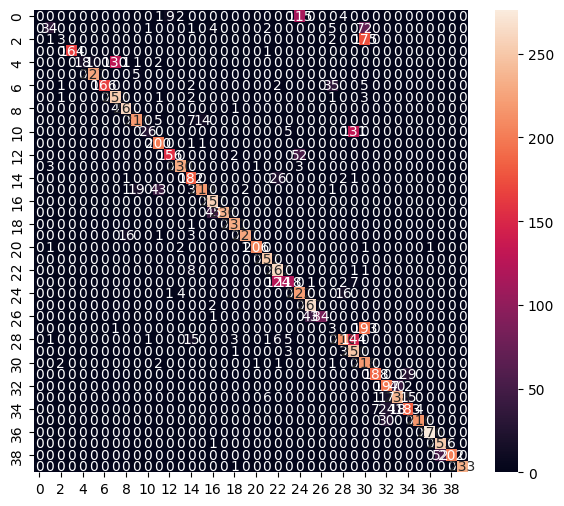

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       131
           1       0.85      0.29      0.43       119
           2       0.43      0.02      0.03       181
           3       1.00      0.99      1.00       165
           4       1.00      0.11      0.20       162
           5       0.96      0.98      0.97       232
           6       1.00      0.79      0.88       211
           7       0.65      0.97      0.78       261
           8       0.93      0.98      0.96       266
           9       0.90      0.89      0.90       244
          10       0.93      0.16      0.27       162
          11       0.78      0.99      0.88       202
          12       0.94      0.74      0.83       210
          13       0.97      0.97      0.97       237
          14       0.81      0.86      0.83       212
          15       0.94      0.76      0.84       288
          16       0.83      1.00      0.91       257
     

c:\Users\nicol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nicol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nicol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\nicol\AppData\Local\Temp\tmpf6igqos1\assets


7860

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.1935666e-12 3.2911082e-08 7.7214874e-09 2.4230087e-10 1.9153635e-08
 1.2025138e-10 2.7388611e-13 5.1470867e-08 1.1246227e-09 5.5928770e-16
 3.1024019e-23 1.8035657e-14 2.3553063e-17 4.9557127e-09 2.2107741e-14
 3.9592771e-16 1.0407625e-03 6.3765408e-03 8.0419619e-14 4.9828206e-16
 2.6678106e-11 7.6841262e-09 1.2825707e-19 2.8388683e-22 3.1348279e-14
 9.8946023e-01 2.0554801e-03 3.4054275e-14 9.8008753e-16 7.9941225e-22
 1.4499254e-13 8.7530323e-05 1.6321289e-07 8.1310299e-07 2.4046162e-06
 7.5584973e-07 1.1934234e-06 9.0180598e-05 6.1133345e-05 8.2276028e-04]
25
